## Observations and Insights 

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import os
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_counts_before = mouse_data["Mouse ID"].nunique()
mouse_counts_before

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_dupes = mouse_data[mouse_data.duplicated(['Mouse ID', 'Timepoint'])]
mouse_dupes_ID = mouse_dupes.iloc[0, 0]
mouse_dupes_ID

'g989'

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_dupes_all = mouse_data[mouse_data['Mouse ID'] == mouse_dupes_ID]
mouse_dupes_all

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data.drop(mouse_data[mouse_data['Mouse ID'] == mouse_dupes_ID].index, inplace = True)
mouse_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_counts_after = mouse_data["Mouse ID"].nunique()
mouse_counts_after

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen = mouse_data["Drug Regimen"]

regimen = regimen.drop_duplicates()
drug_name = []
regimen_tumorvol_mean = []
regimen_tumorvol_median = []
regimen_tumorvol_var = []
regimen_tumorvol_std = []
regimen_tumorvol_sem = []

for drug in regimen:
    drug_name.append(drug)
    regimen_tumorvol = mouse_data.loc[mouse_data['Drug Regimen']==drug, 'Tumor Volume (mm3)']
    regimen_tumorvol_mean.append(regimen_tumorvol.mean())
    regimen_tumorvol_median.append(regimen_tumorvol.median())
    regimen_tumorvol_var.append(regimen_tumorvol.var())
    regimen_tumorvol_std.append(regimen_tumorvol.std())
    regimen_tumorvol_sem.append(regimen_tumorvol.sem())
    

statistics_dict = {'Drug Regimen': drug_name,
    'Mean':regimen_tumorvol_mean,
     'Median':regimen_tumorvol_median, 
     'Variance': regimen_tumorvol_var, 
     'Standard Deviation': regimen_tumorvol_std,
     'SEM': regimen_tumorvol_sem}

statistics_df = pd.DataFrame(statistics_dict)
statistics_df = statistics_df.sort_values('Drug Regimen')
statistics_df = statistics_df.set_index('Drug Regimen')

statistics_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
drug_group = mouse_data.groupby(["Drug Regimen"])
drug_group_tumorvol = drug_group["Tumor Volume (mm3)"]
drug_group_describe = drug_group_tumorvol.describe()
drug_group_describe["Variance"] = drug_group_tumorvol.var()
drug_group_describe["SEM"] = drug_group_tumorvol.sem()
drug_group_describe = drug_group_describe.rename(columns={"mean":"Mean", "50%":"Median", "std": "Standard Deviation"})

statistics_groupby = drug_group_describe.loc[:, ["Mean", "Median", "Variance", "Standard Deviation", "SEM"]]

statistics_groupby


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Total Number of Mice for Each Treatment')

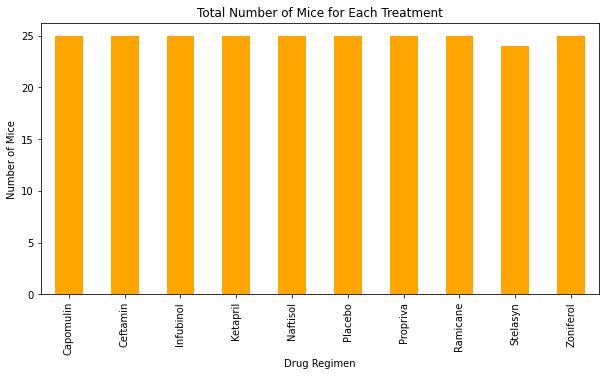

In [62]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
treatment_group = mouse_data.groupby(["Drug Regimen"])
unique_mouseIDs = treatment_group["Mouse ID"].nunique()

mouseID_plot = unique_mouseIDs.plot(kind="bar", color="orange", figsize=(10,5))

# Set the y-axis label
mouseID_plot.set_ylabel("Number of Mice")
# Set the title for plot
mouseID_plot.set_title("Total Number of Mice for Each Treatment")



Text(0.5, 1.0, 'Total Number of Mice for Each Treatment')

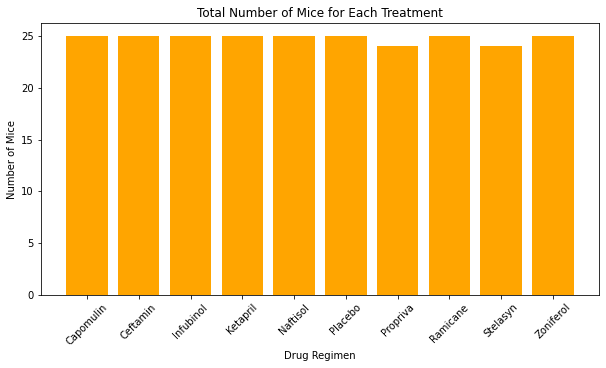

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(unique_mouseIDs))
x_axis

plt.figure(figsize=(10,5))
plt.bar(x_axis, unique_mouseIDs, color='orange', align="center")
plt.xticks(x_axis, unique_mouseIDs.index, rotation=45)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Total Number of Mice for Each Treatment")


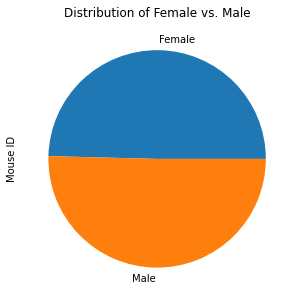

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_group = mouse_data.groupby(["Sex"])
unique_sex_counts = sex_group["Mouse ID"].nunique()

unique_sex_counts.plot(kind="pie", title="Distribution of Female vs. Male",
                       figsize=(10,5))

Text(0.5, 1.0, 'Distribution of Female vs. Male')

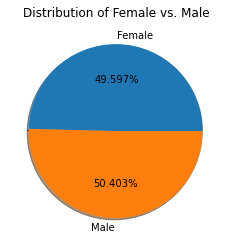

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(unique_sex_counts, labels=unique_sex_counts.index, autopct="%1.3f%%", shadow=True)
plt.title("Distribution of Female vs. Male")

## Quartiles, Outliers and Boxplots

In [45]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_selected_regimen = mouse_data[mouse_data['Drug Regimen'].isin(["Capomulin","Ramicane", "Infubinol", "Ceftamin"])]
mouse_max_TP = mouse_selected_regimen.groupby(['Mouse ID'], sort=False)['Timepoint'].max().to_frame("Max Timepoint")
mouse_max_TP_treatment = pd.merge(mouse_max_TP, mouse_data, how="inner", left_on=['Mouse ID','Max Timepoint'], right_on = ['Mouse ID','Timepoint'])
mouse_max_TP_treatment

,Mouse ID,Max Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,45,Ramicane,Male,21,16,45,22.050126,1
1,s185,45,Capomulin,Female,3,17,45,23.343598,1
2,x401,45,Capomulin,Female,16,15,45,28.484033,0
3,m601,45,Capomulin,Male,22,17,45,28.430964,1
4,g791,45,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...,...
95,x822,45,Ceftamin,Male,3,29,45,61.386660,3
96,y163,45,Infubinol,Female,17,27,45,67.685569,3
97,y769,45,Ceftamin,Female,6,27,45,68.594745,4
98,y865,45,Ceftamin,Male,23,26,45,64.729837,3


In [53]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_names = []
for name in mouse_max_TP_treatment['Drug Regimen']:
    if name not in treatment_names:
        treatment_names.append(name)
        
treatment_names = sorted(treatment_names)

# Create empty list to fill with tumor vol data (for plotting)
treatment_stats = []

             
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    # Determine outliers using upper and lower bounds
for name in treatment_names:
    treatment = mouse_max_TP_treatment.loc[(mouse_max_TP_treatment['Drug Regimen']==name)]['Tumor Volume (mm3)']
    quantiles = treatment.quantile([.25,.5,.75])
    Q1 = quantiles[0.25]
    Q3 = quantiles[0.75]
    iqr = Q3 - Q1
    lower_bound = Q1 - (1.5*iqr)
    upper_bound = Q3 + (1.5*iqr)
    outliers = treatment.loc[(treatment < lower_bound) | (treatment > upper_bound)]
    print(outliers)
    #treatment_stats.append({'Treatment': name,
#                     'Q1': Q1,
#                     'Q3': Q3,
#                     'IQR': iqr,
#                     'Lower_Bound': lower_bound,
#                     'Upper_Bound': upper_bound,
#                     'Outliers': outliers})


print(treatment_stats)


Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
58    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)
[]


Text(0.5, 0, 'Drug Treatments')

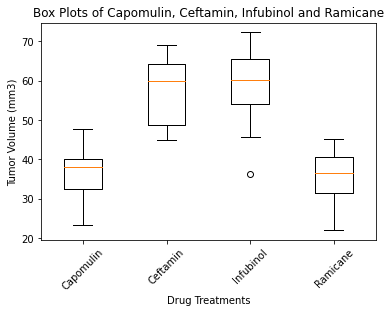

In [64]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Capomulin = mouse_max_TP_treatment.loc[(mouse_max_TP_treatment['Drug Regimen']=='Capomulin')]['Tumor Volume (mm3)']
Ceftamin = mouse_max_TP_treatment.loc[(mouse_max_TP_treatment['Drug Regimen']=='Ceftamin')]['Tumor Volume (mm3)']
Infubinol = mouse_max_TP_treatment.loc[(mouse_max_TP_treatment['Drug Regimen']=='Infubinol')]['Tumor Volume (mm3)']
Ramicane = mouse_max_TP_treatment.loc[(mouse_max_TP_treatment['Drug Regimen']=='Ramicane')]['Tumor Volume (mm3)']

treatments_combined = [Capomulin, Ceftamin, Infubinol, Ramicane]
treatments_combined

fig7, ax7 = plt.subplots()
ax7.set_title('Box Plots of Capomulin, Ceftamin, Infubinol and Ramicane')
ax7.boxplot(treatments_combined)
ax7.set_xticklabels(treatment_names, rotation=45)
ax7.set_ylabel("Tumor Volume (mm3)")
ax7.set_xlabel("Drug Treatments")

## Line and Scatter Plots

Text(0.5, 1.0, 'Timepoint vs. Tumor Volume (mm3) for Mouse ID m601')

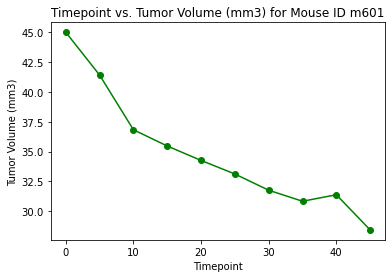

In [71]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
selected_mouse_Capomulin = mouse_data[(mouse_data['Drug Regimen']=="Capomulin") & (mouse_data['Mouse ID']=="m601")]
selected_mouse_Capomulin
x_axis = selected_mouse_Capomulin['Timepoint']
y_axis = selected_mouse_Capomulin['Tumor Volume (mm3)']
plt.plot(x_axis, y_axis, marker ='o', color='green', label="Tumor Volume")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Timepoint vs. Tumor Volume (mm3) for Mouse ID m601")

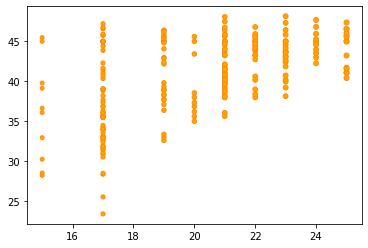

In [76]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
selected_Capomulin = mouse_data[(mouse_data['Drug Regimen']=="Capomulin")]
x_axis = selected_Capomulin['Weight (g)']
y_axis = selected_Capomulin['Tumor Volume (mm3)']

plt.scatter(x=x_axis, y=y_axis, marker="o", facecolors="orange", edgecolors="darkorange", s=x_axis)

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
